Exp 14) Write a python program using Random Forest Regression predict house prices on Boston dataset

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load Boston housing dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data
y = boston.target

In [ ]:
#Split the dataset into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


X_train:  (404, 13)
X_test:  (102, 13)
y_train:  (404,)
y_test:  (102,)


In [ ]:
# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on test set
y_pred = rf.predict(X_test)

In [ ]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 7.90
R² Score: 0.89


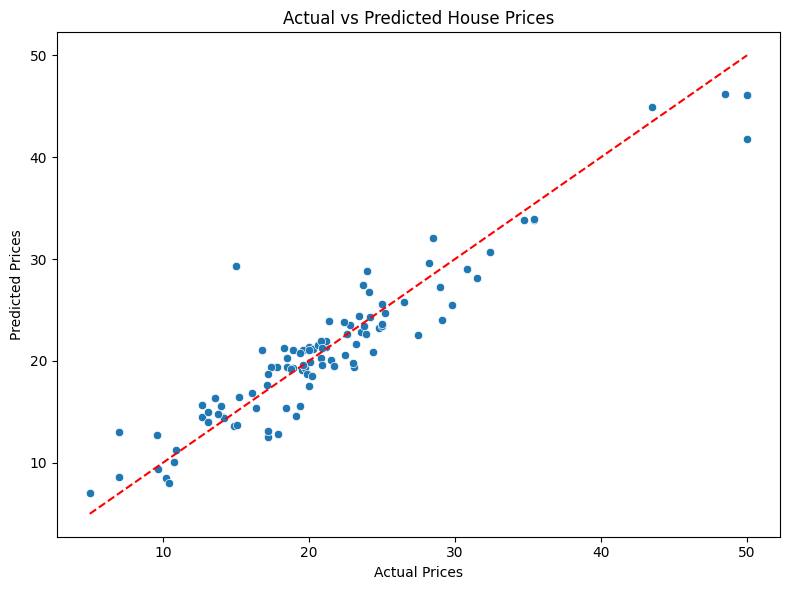

In [ ]:
# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

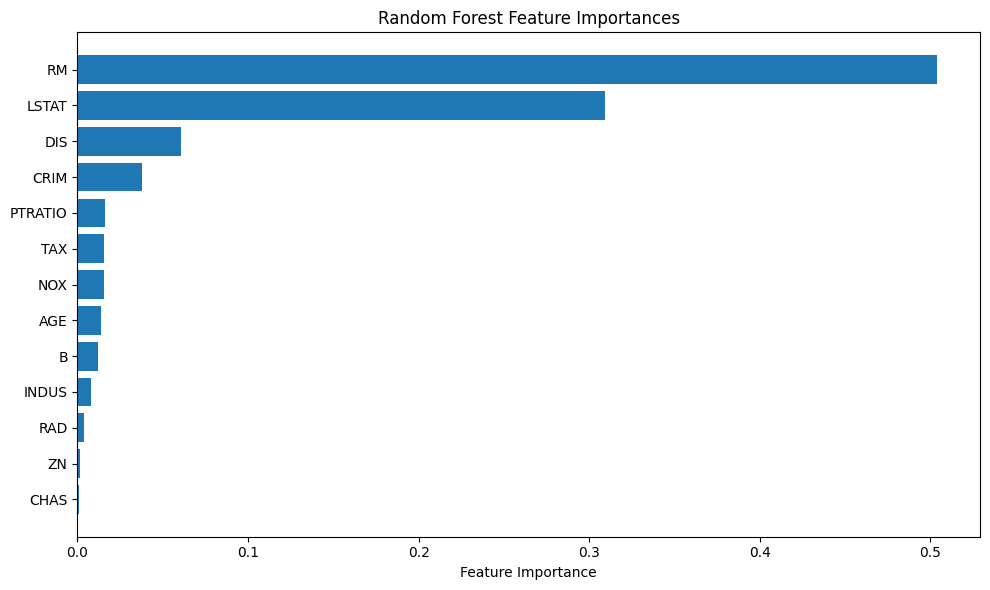

In [ ]:
# Plot feature importance
importances = rf.feature_importances_
features = X.columns
sorted_indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()